<a href="https://colab.research.google.com/github/Mahima29/STDENT-ADMISSION-PREDICTION-/blob/master/ADMISSION_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np # for mathematical calculations
import matplotlib.pyplot as plt # for plotting the images
import sklearn
import seaborn as sns # for data visualisation
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all" #for printing multiple statements
#I have downloaded it saved it in local as 'binary.csv'
# Define the headers since the data does not have any
#headers = ["Admit","GRE","GPA","Rank"]
df =pd.read_csv("binary.csv" ) # Read in the CSV file
##First step is to visualize our dataset
print ("Head values:")
df.head() #Check first 5 rows
print ("Types:")
df.dtypes #Check types of data
print(type(df)) #Check type of df
print ("Dataset Shape values:")
df.shape #Check shape of dataset
df.info() #Check some information
print ("Any Null values:")
df.isnull().values.any() #Check if there are any null values in data

Head values:
Types:
<class 'pandas.core.frame.DataFrame'>
Dataset Shape values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB
Any Null values:


False

In [ ]:
##Second step is to check for some statistics
print ("Sum of each column:")
df.sum() #Sum of each column value
##Here sum of admit and rank column is not meaningful. Even the sum of GRE and GPA column seems meaningless.
##But from these value, We can say that we have to normalize the each feature for further calculation.
print ("Mean values: (Sum/Total examples)")
df.mean()
df.describe() #Some more statistics

Sum of each column:


admit       127.00
gre      235080.00
gpa        1355.96
rank        994.00
dtype: float64

Mean values: (Sum/Total examples)


admit      0.3175
gre      587.7000
gpa        3.3899
rank       2.4850
dtype: float64

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


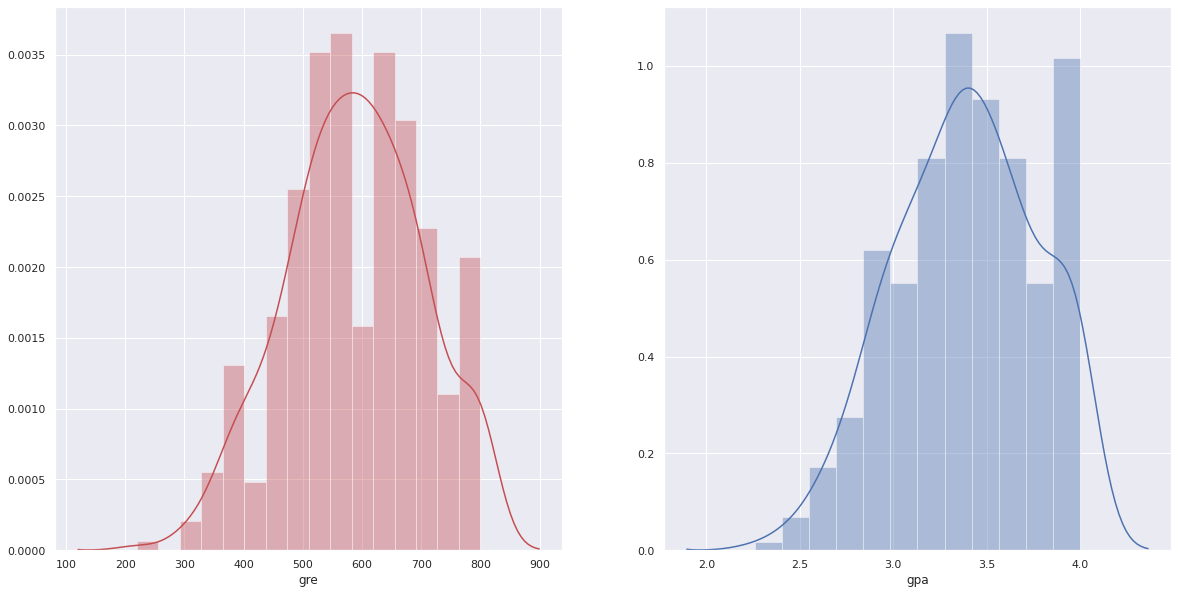

In [ ]:
#Third step is to visualize these data in graphical form
#I have used Seaborn library for data visualization
sns.set(color_codes=True)
f, axes =plt.subplots(1, 2, figsize=(20, 10)) #Set multiple axis
#GRE data
sns.distplot(df.iloc[:,1],color="r",ax= axes[0]) #All Row data and first column
#GPA data
sns.distplot(df.iloc[:,2],color="b",ax= axes[1]) #All Row data and second column
#We can see that the data forms good bell shaped curve.(Distributed in Gaussian values.)

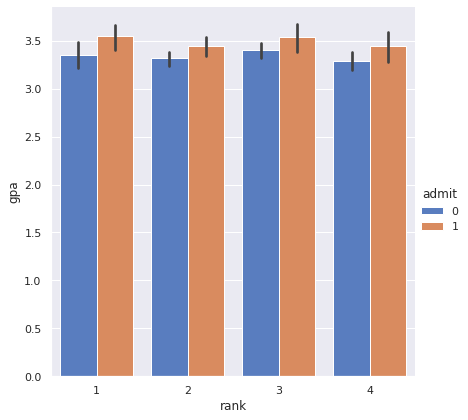

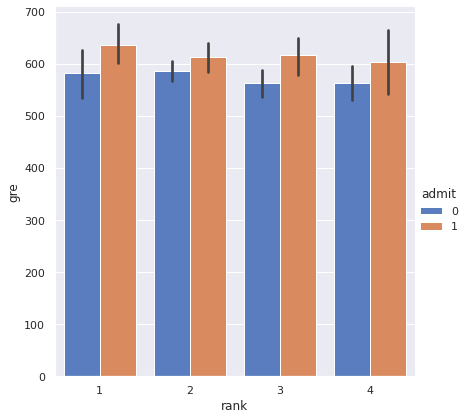

In [ ]:
#Catplot show frequencies of the given categories
sns.catplot(x="rank", y="gpa", hue="admit", data=df, height=6, kind="bar", palette="muted")
sns.catplot(x="rank", y="gre", hue="admit", data=df,height=6, kind="bar", palette="muted")

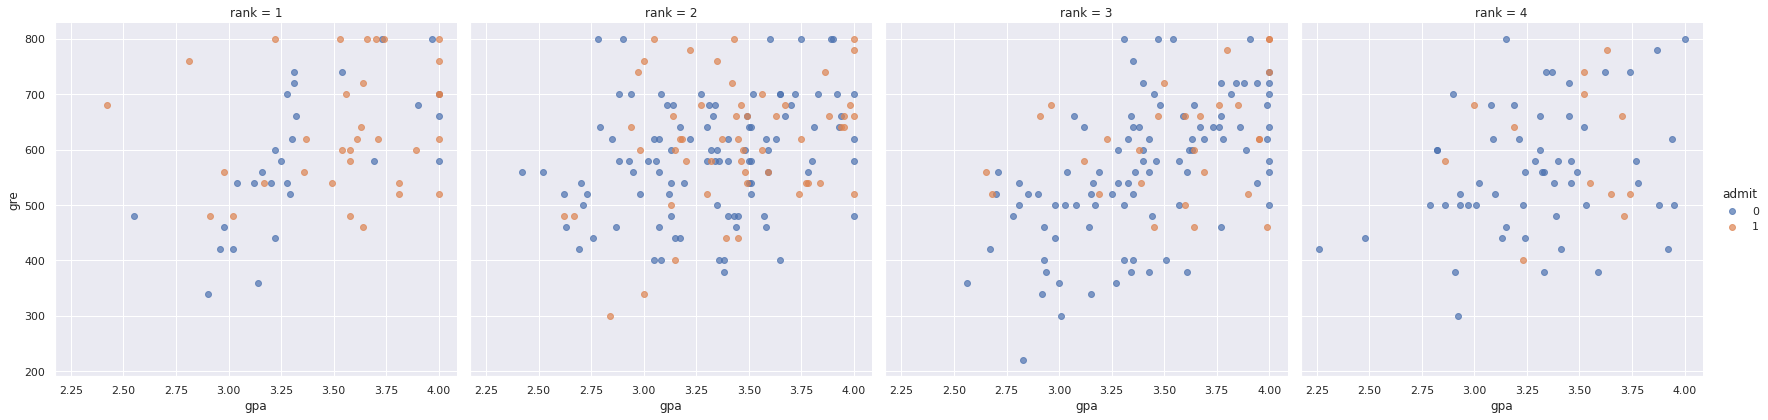

In [ ]:
#Draw graphs for gre -->gpa for rank1,2,3,4
g =sns.FacetGrid(df,col='rank',hue="admit",height=6)
g.map(plt.scatter, "gpa", "gre", alpha=.7)
g.add_legend();
# From below graphs, we can see that for each rank, data are scattered randomly and we cannot draw a line to separate/rejected.

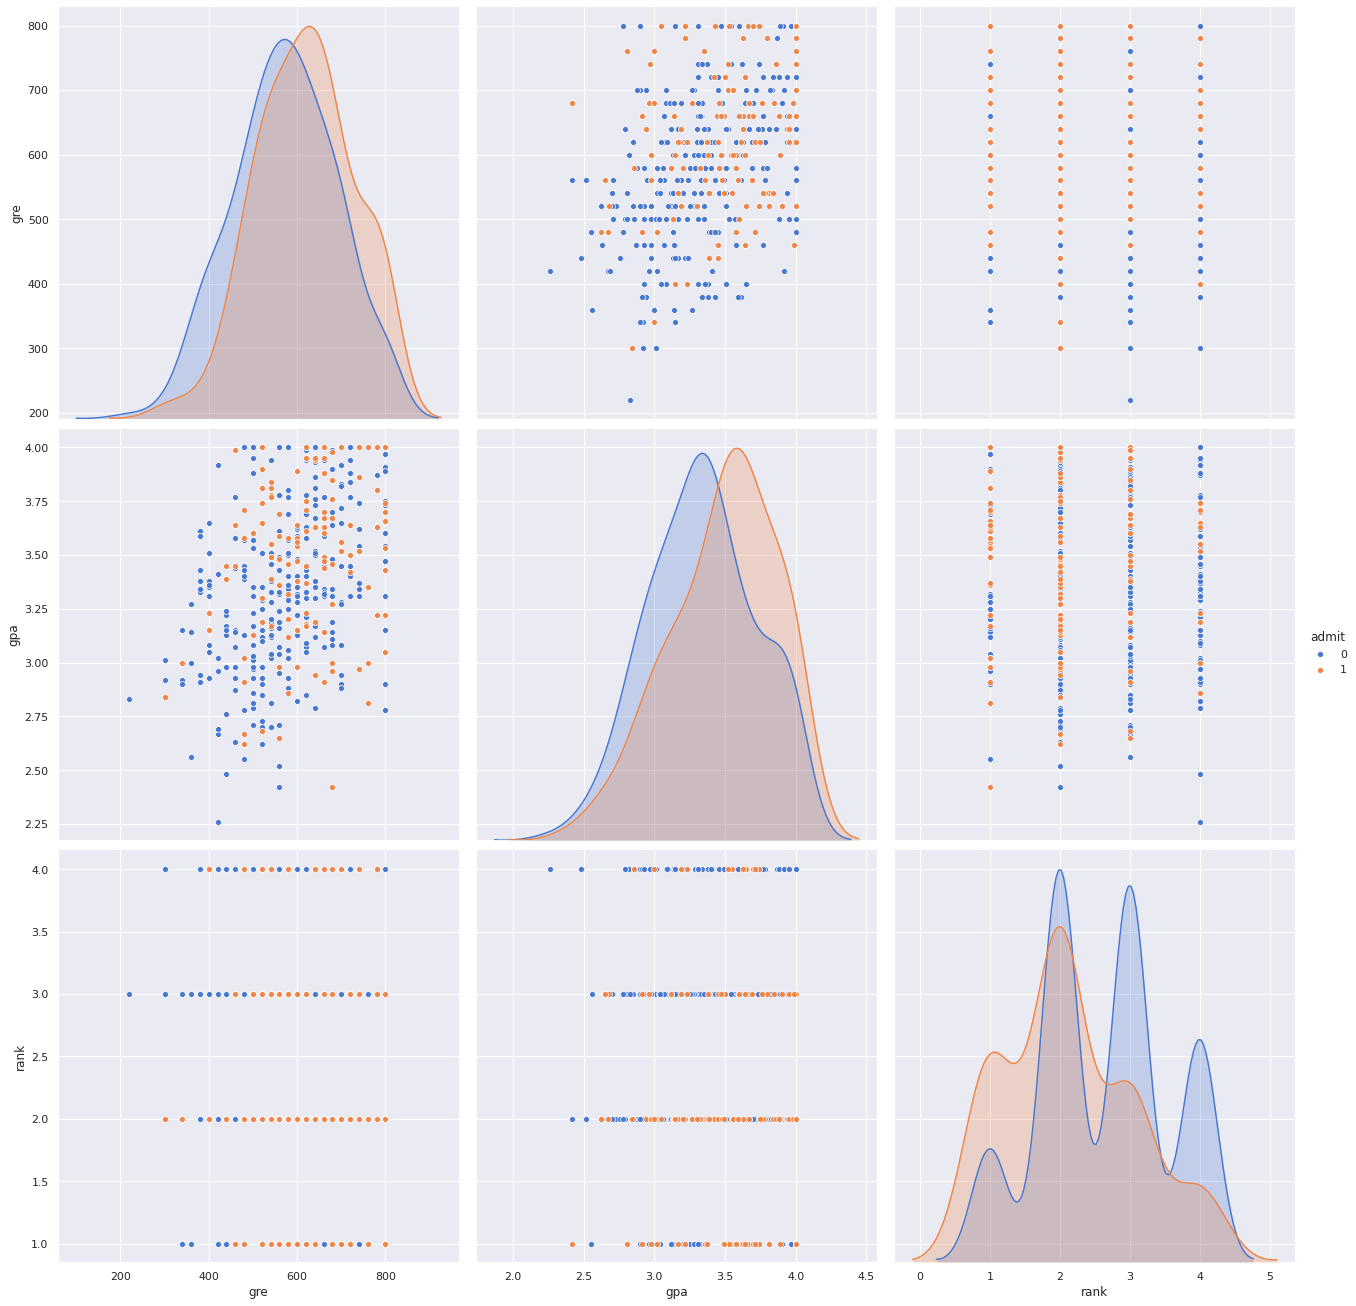

In [ ]:
sns.pairplot(df, hue="admit",palette="muted",x_vars=['gre','gpa','rank'],y_vars=['gre','gpa','rank'],height=6)
#From following graphs we can the data are scattered randomly and we cannot draw a simple boundary line for accepted/rejected

In [ ]:
#Forth part is to train our own model using sigmoid function and find accuracy of it.
#First of all, we have to convert 'rank' column into four seperate columns according to its value.
df_with_dummies=pd.get_dummies( df['rank'] ) #get dummies method used
#This will create four columns and fill values according to original column value. SO if in original 'rank' column,
#if the value is 3 for some example then in new columns, column 3 will have value 1 and all other (1,2,4) will have
#value 0
df_with_dummies.head()

,1,2,3,4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [ ]:
df_new=pd.concat([df, df_with_dummies], axis=1)
df_new=df_new.drop('rank',axis=1)
df_new.head()

,admit,gre,gpa,1,2,3,4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


In [ ]:
#Now we need to normalize GRE and GPA columns value as they have large values.
# Sigmoid function used.
#This function gives zero slope for very large and small values.
#So gradient descent will be zero if we use large values.
#So, I have normalize both columns with mean value as 0 and standard deviation as 1
gre_mean,gre_std=df_new['gre'].mean(),df_new['gre'].std()
gpa_mean,gpa_std=df_new['gpa'].mean(),df_new['gpa'].std()
df_new.loc[:,'gre'] = (df_new['gre'] -gre_mean) /gre_std
df_new.loc[:,'gpa'] = (df_new['gpa'] -gpa_mean) /gpa_std
df_new.head()

,admit,gre,gpa,1,2,3,4
0,0,-1.798011,0.578348,0,0,1,0
1,1,0.625884,0.736008,0,0,1,0
2,1,1.837832,1.603135,1,0,0,0
3,1,0.452749,-0.525269,0,0,0,1
4,0,-0.586063,-1.208461,0,0,0,1


In [ ]:
msk=np.random.rand(len(df_new)) <0.9
train =df_new[msk]
test =df_new[~msk]
print (len(train))
print (len(test))
print (train.head())

360
40
   admit       gre       gpa  1  2  3  4
0      0 -1.798011  0.578348  0  0  1  0
1      1  0.625884  0.736008  0  0  1  0
2      1  1.837832  1.603135  1  0  0  0
3      1  0.452749 -0.525269  0  0  0  1
4      0 -0.586063 -1.208461  0  0  0  1


In [ ]:
# Split into features and targets
features, targets =train.drop('admit', axis=1), train['admit']
features_test, targets_test=test.drop('admit', axis=1), test['admit']
#Sigmoid function definition
def sigmoid(x):
  return 1/ (1+np.exp(-x))
def sigmoid_prime(x):
  return sigmoid(x) * (1- sigmoid(x))
#n_records will have no. of rows and n_features will have no. of column value
n_records, n_features=features.shape
last_loss=None
weights =np.random.normal(scale=1/n_features**.5, size=n_features) # Initialize weights
#print (weights)
# Neural Network hyperparameters
epochs =1000
learnrate=0.5
for e in range(epochs):
  del_w=np.zeros(weights.shape)
for x, y in zip(features.values, targets):# Loop through all records, x is the input, y is the target
#del_w, W and X are 1 x 6.
  output = sigmoid(np.dot(x,weights))# np.dot will do element wise element multiplication.
  error = (y - output) *sigmoid_prime(np.dot(x,weights))
  del_w+= error * x
  weights += (learnrate*del_w )/n_records

In [ ]:
# Printing out the mean square error on the training set
if e % (epochs /10) ==0:
  out =sigmoid(np.dot(features, weights))
  loss =np.mean((out - targets) **2)
if last_loss and last_loss < loss:
  print("Train loss: ", loss, " WARNING - Loss Increasing")
else:
  print("Train loss:", loss)
  last_loss= loss
# Calculate accuracy on test data
tes_out=sigmoid(np.dot(features_test, weights))
predictions =tes_out>0.5
accuracy =np.mean(predictions ==targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

NameError: ignored

In [ ]:
#Sixth part is about understanding of Machine learning models from sklearn module.
#Above we have already created train and test data.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#Model Preparation
num_trees=200
max_features=3
models = []
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))
print (models)

[('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)), ('LDA', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')), ('DTC', DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
    

In [ ]:
msk1 =np.random.rand(len(df)) <0.9
train_on_original= df[msk1]
test_on_original= df[~msk1]
print (len(train_on_original))
print (len(test_on_original))
print (train_on_original.head())
# Split into features and targets
features_train_original, targets_train_original=train_on_original.drop('admit', axis=1), train_on_original['admit']
features_test_original, targets_test_original=test_on_original.drop('admit', axis=1), test_on_original['admit']

357
43
   admit  gre   gpa  rank
0      0  380  3.61     3
3      1  640  3.19     4
4      0  520  2.93     4
5      1  760  3.00     2
6      1  560  2.98     1


In [ ]:
#Fit model
from sklearn.model_selection import KFold
results = []
names = []
scoring ='accuracy'
clf=LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
for name,model in models:
  param_grid=dict(gamma='auto')
kfold=KFold(n_splits=10,random_state=7)
cv_results= cross_val_score(model,features_train_original,targets_train_original,cv=kfold,scoring=scoring)
results.append(cv_results)
names.append(name)
msg="%s: %f (%f)"% (name, cv_results.mean(), cv_results.std())
print(msg)
print (results)

SVM: 0.697222 (0.072349)
[array([0.61111111, 0.77777778, 0.80555556, 0.69444444, 0.80555556,
       0.66666667, 0.61111111, 0.71428571, 0.65714286, 0.62857143])]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[Text(0, 0, 'SVM')]

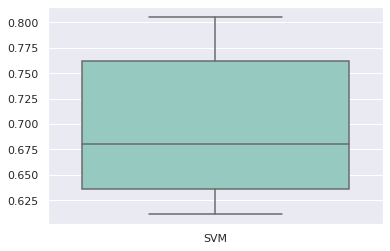

In [ ]:
ax=sns.boxplot(data=results, palette="Set3")
ax.set_xticklabels(names)

In [ ]:
#Now the prediction of a new data on any model. I have worked with LDA.
model =LinearDiscriminantAnalysis()
model.fit(features_train_original,targets_train_original)
predictions =model.predict(features_test_original)
print (predictions)
print ("LDA Model")
print (accuracy_score(targets_test_original, predictions)*100)
print(classification_report(targets_test_original, predictions))

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

[0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0]
LDA Model
69.76744186046511
              precision    recall  f1-score   support

           0       0.66      0.96      0.78        24
           1       0.88      0.37      0.52        19

    accuracy                           0.70        43
   macro avg       0.77      0.66      0.65        43
weighted avg       0.75      0.70      0.66        43



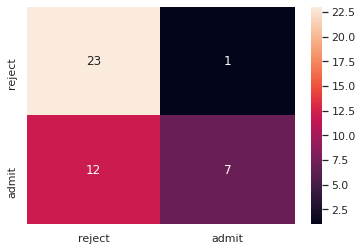

In [ ]:
#LDA is trained on the training data also we have made predictions on test data.
#So the overall accuracy is 87.5% with LDA.
cm =confusion_matrix(targets_test_original,predictions)
sns.heatmap(cm,annot=True,xticklabels=['reject', 'admit'],yticklabels=['reject', 'admit'])

In [ ]:
#Prediction on new data
labels = ["Rejected","Accepted"]
#data_x = [gre,gpa,rank]
data_1 =np.array([750,4,1],ndmin=2)
data_2 =np.array([700,2,3],ndmin=2)
data_3 =np.array([200,2,4],ndmin=2)
prediction_1 =model.predict(data_1)
prediction_2 =model.predict(data_2)
prediction_3 =model.predict(data_3)
print ("Status for data_1 is: ", labels[int(prediction_1)])
print ("Status for data_2 is: ", labels[int(prediction_2)])
print ("Status for data_3 is: ", labels[int(prediction_3)])
# As we can see for data_1 both gre and gpa and rank is higher so it is accepted
# For data_2 gpa is low that’s why it is rejected
# For data_3 gpa, gre and rank is low so it is rejected.

Status for data_1 is:  Accepted
Status for data_2 is:  Rejected
Status for data_3 is:  Rejected
